In [1]:
from __future__ import division
from __future__ import print_function

from myhdl import Signal, intbv, always_seq
from support import vcd

from test_02_mex import test

%matplotlib inline

## Greatest Common Divisor
The goal of this exercise is to implement a module that 
calculates the [greatest common divisor](https://en.wikipedia.org/wiki/Greatest_common_divisor).


### Exercise Description
Two input signals: `a` and `b` are presented to the module, the `start` strobe starts the calculation, the values present on `a` and `b` when `start` is active are the values used to calculate the GCD.  See the above link for various methods (algorithms) to calculate the GCD.

### Handshanking
The number of clock cycles required to compute the GCD is not specified 
for this module.  Because the clock cycles are not defined or indented 
to be static another mechanism is needed  


In [2]:
def gcd(clock, reset, a, b, c, start, finished):
    
    # example of handshaking, the finished is toggled 
    # after the start strobe.
    @always_seq(clock.posedge, reset=reset)
    def beh():
        if start:
            finished.next = False
        elif not finished:
            finished.next = True 
            
    return beh


In [3]:
test(gcd)

Test Error
Last 5 clock cycles
 sim step | a         | b         | c         | start     | finish    | 
 5        |        0  |        0  |        0  |        0  |        1  | 
 15       |        0  |        0  |        0  |        0  |        1  | 
 25       | 11699589  | 11773656  |        0  |        1  |        1  | 
 35       | 11699589  | 11773656  |        0  |        0  |        0  | 
 45       | 11699589  | 11773656  |        0  |        0  |        1  | 



(<matplotlib.figure.Figure at 0x727af60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x73f7c88>)

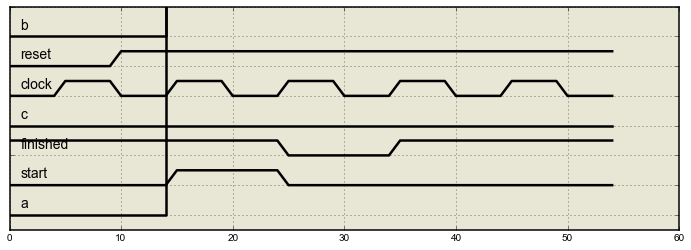

In [4]:
# VCD notebook plot is experimental ... 
vcd.parse_and_plot('vcd/02_mex.vcd')